## Minority Game
This replicates as far as possible the results from various papers such as Challet 1997, and extends the results.


In [32]:
from MinorityGame2 import MinorityGame, Player
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

from multiprocessing import Pool, cpu_count

## MinorityGame class
The MinorityGame class is defined by the number of agents, N; the memory, M; the number of rounds played, rounds; the number of strategies per agent, S; a random flag where actions are chosen randomly rather than selecting the best strategy in S if True; a use_new_payoff flag which asigns points based on the size of the minority action if set to True, if false 1 point is awarded to the majority action.

MinorityGame(N, M, rounds, S, random_flag, use_new_payoff)


In [35]:
# Example use
minority_game = MinorityGame(51, 3, 30, 2, False, False)
minority_game.run()

In [37]:
# Example to extract strategies
minority_game.players[40].strategies

[{'actions': [0, 0, 1, 0, 0, 1, 0, 0], 'score': 16},
 {'actions': [0, 0, 1, 0, 0, 1, 0, 1], 'score': 16}]

In [39]:
minority_game.attendance

[26,
 27,
 26,
 32,
 22,
 32,
 21,
 33,
 26,
 24,
 24,
 17,
 25,
 33,
 18,
 14,
 23,
 22,
 28,
 23,
 24,
 33,
 34,
 24,
 31,
 19,
 38,
 28,
 38,
 31]

In [41]:
minority_game.get_variance_normalized()

0.6872331154684095

In [43]:
# Standard Payoff
minority_game_standard = MinorityGame(1001, 12, 25000, 4, random_flag=False, use_new_payoff=False)
minority_game_standard.run()

In [44]:
#New Payoff (based on minority action size)
minority_game_new_payoff = MinorityGame(1001, 7, 25000, 4, random_flag=0, use_new_payoff=True)
minority_game_new_payoff.run()

## Frequency Distribution of Attendance
Histograms of attendance are shown below for the standard and proportional payoffs.  Interesting to note is the fact that when the payoff is higher for smaller minorities, the agents group themselves differently.  ie some emerging cooperation is seen.

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        2.600e+01, 4.200e+01, 9.900e+01, 2.590e+02, 5.160e+02, 9.530e+02,
        1.568e+03, 2.212e+03, 2.894e+03, 3.265e+03, 3.223e+03, 3.101e+03,
        2.590e+03, 1.832e+03, 1.131e+03, 6.720e+02, 3.490e+02, 1.640e+02,
        6.300e+01, 2.500e+01, 1.000e+01, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array

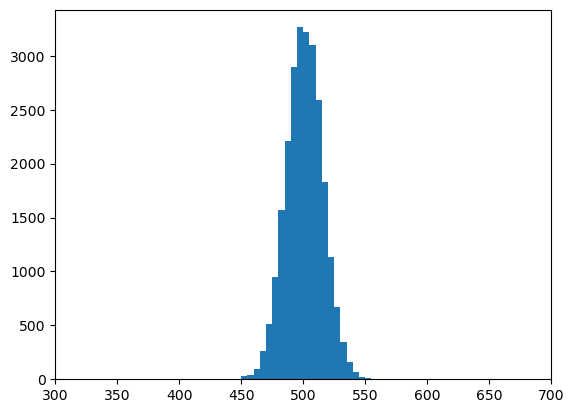

In [46]:
plt.xlim(300,700)
plt.hist(minority_game_standard.attendance,80, (300,700))

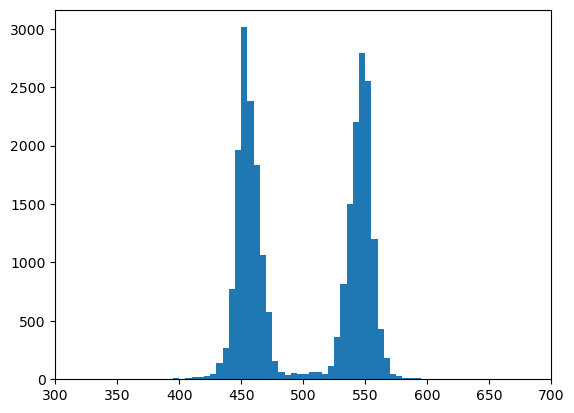

In [47]:
plt.xlim(300,700)
plt.hist(minority_game_new_payoff.attendance,80,(300,700))
plt.savefig("Attendance frequency for N - minority count payoff")

## Standard deviation of attendance
This quantity is critical for the analysis of the minority game.  A larger standard deviation implies a larger overshoot or undershoot from the mean, or a greater waste of resources.  The standard deviation can be seen in the plots of attendance rate over time and varies fairly widely as a function of the different input variables.

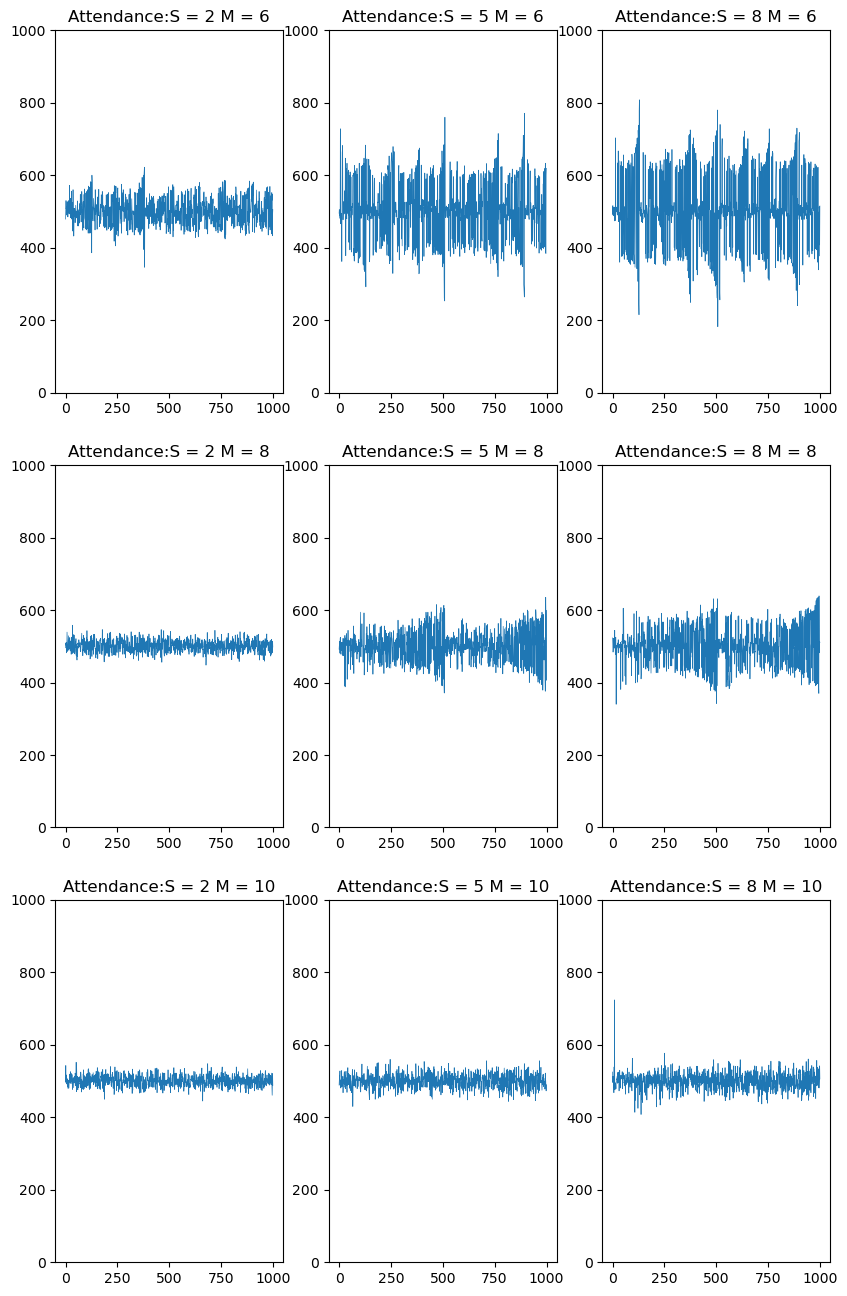

In [19]:
N = 1001      # Number of players
S = [2, 5, 8]       # Number of strategies per player
rounds = 1000
m=[6,8,10]
plt.figure(figsize=(10, 16)) 

for idx, i in enumerate(m):
   for id, strat in enumerate(S): 
        minority_game= MinorityGame(N, i, rounds, strat, False, False)
        minority_game.run()
    
        plt.subplot(3,3,idx*3+id+1)
        plt.plot(minority_game.attendance, linewidth=0.5)
        plt.ylim(0,1000)
        plt.title(f"Attendance:S = {strat} M = {i}")

plt.savefig("Attendance for different M")

## Player points
Attendance rates give us an overview of how the market as a whole distributes scarce resources.  The graph below looks at the distribution of 

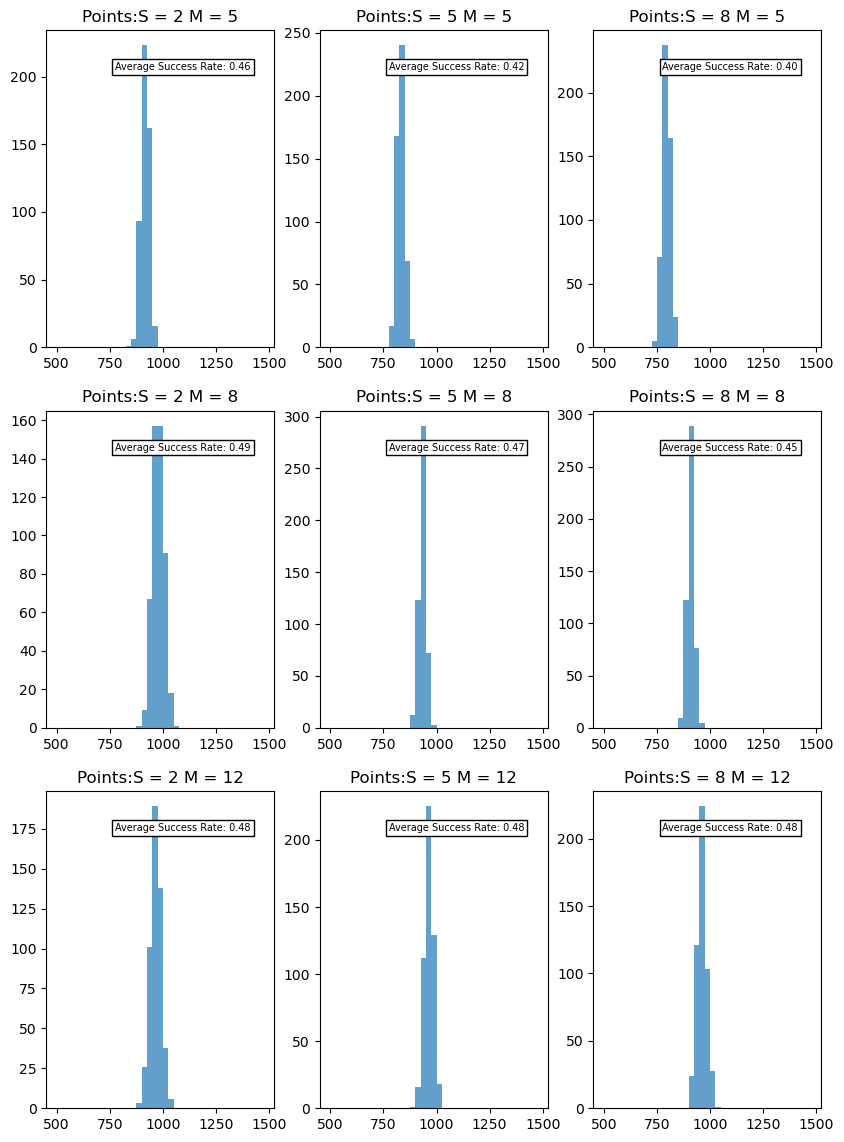

In [21]:
N = 501      # Number of players
S = [2, 5, 8]       # Number of strategies per player
rounds = 3000
m= [5, 8, 12]


plt.figure(figsize=(10, 14)) 

for idx, i in enumerate(m):
   for id, strat in enumerate(S): 
        minority_game= MinorityGame(N, i, rounds, strat,0,0)
        minority_game.run()
        points = [(player.points_per_round[2999]-player.points_per_round[1000]) for player in minority_game.players]
        average_success_rate = sum(points)/len(points)/2000
       
        plt.subplot(3,3,idx*3+id+1)
        plt.hist(points, bins=range(500,1500,25), alpha=0.7)
        plt.title(f"Points:S = {strat} M = {i}")
        # Add the average points as text on the graph
        plt.text(
            0.6,  # x-coordinate for the text (adjust this to place the text at the desired position)
            0.9,  # y-coordinate for the text (adjust this to place the text at the desired position)
            f"Average Success Rate: {average_success_rate:.2f}",  # Text to display
            transform=plt.gca().transAxes,  # Use axes fraction (0 to 1)
            ha="center",  # Horizontal alignment
            va="top",  # Vertical alignment
            fontsize=7,  # Font size
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square')  # Optional box around text
        )



plt.savefig("Points distribution for different games")




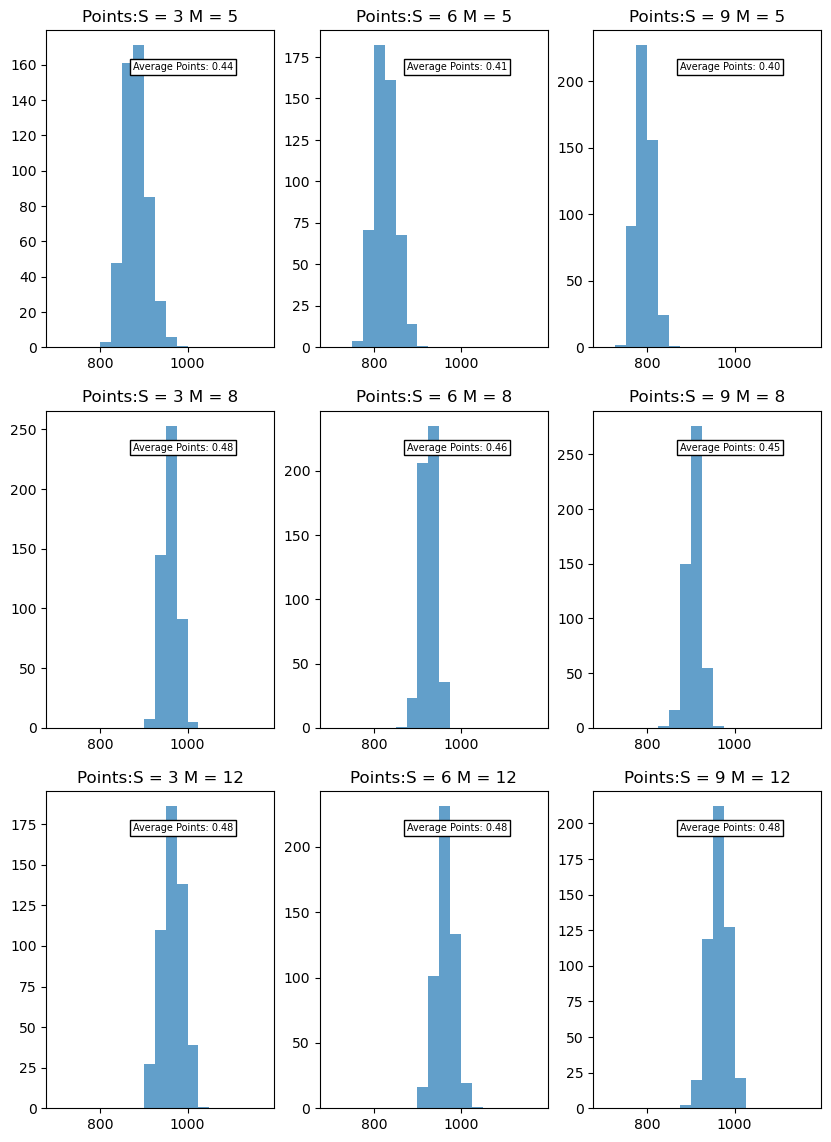

In [22]:
N = 501      # Number of players
S = [3, 6, 9]       # Number of strategies per player
rounds = 3000
m= [5, 8, 12]


plt.figure(figsize=(10, 14)) 

for idx, i in enumerate(m):
   for id, strat in enumerate(S): 
        minority_game= MinorityGame(N, i, rounds, strat,False,0)
        minority_game.run()
        points = [(player.points_per_round[2999]-player.points_per_round[1000]) for player in minority_game.players]
        average_success_rate = sum(points)/len(points)/2000
       
        plt.subplot(3,3,idx*3+id+1)
        plt.hist(points, bins=range(700,1200,25), alpha=0.7)
        plt.title(f"Points:S = {strat} M = {i}")
        # Add the average points as text on the graph
        plt.text(
            0.6,  # x-coordinate for the text (adjust this to place the text at the desired position)
            0.9,  # y-coordinate for the text (adjust this to place the text at the desired position)
            f"Average Points: {average_success_rate:.2f}",  # Text to display
            transform=plt.gca().transAxes,  # Use axes fraction (0 to 1)
            ha="center",  # Horizontal alignment
            va="top",  # Vertical alignment
            fontsize=7,  # Font size
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square')  # Optional box around text
        )



plt.savefig("Points distribution for different games")


## Does Evolutionary Learning take place?
This section runs a long minority game, 80,000 rounds, and compares the average success rates for consecutive periods of different length.

In [32]:
minority_game = MinorityGame(501, 9, 80000, 3, random_flag=0, use_new_payoff=False)
minority_game.run()

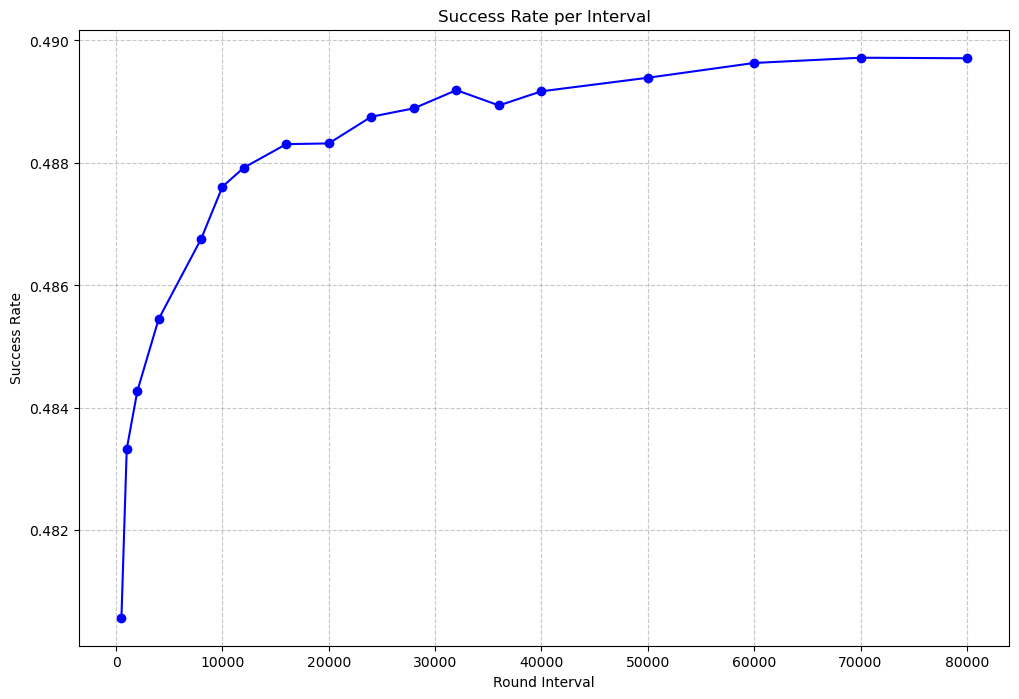

In [44]:
def calculate_success_rate(game, intervals):
    """
    Calculate the success rate for each interval based on accumulated points.
    
    Parameters:
    - game: The MinorityGame object containing the points data.
    - intervals: A list of round intervals (e.g., [1000, 2000, 3000, 4000]).
    
    Returns:
    - success_rates: A list of success rates for each interval.
    """
    success_rates = []
    
    # Calculate the points at the end of each interval
    for i in range(1, len(intervals)):
        start_round = intervals[i-1]
        end_round = intervals[i]
        
        # Calculate the total points at the start and end of the interval
        points_start = [player.points_per_round[start_round - 1] for player in game.players]
        points_end = [player.points_per_round[end_round - 1] for player in game.players]
        
        # Calculate the difference in points and divide by the interval size
        total_diff = np.sum(np.array(points_end) - np.array(points_start))/len(game.players)
        success_rate = total_diff / (end_round - start_round) # Calculate a success rate 
        success_rates.append(success_rate)
    
    return success_rates 

def plot_success_rate(game, intervals):
    success_rates = calculate_success_rate(game, intervals)
    
    # Plot the success rate over intervals
    plt.figure(figsize=(12, 8))
    plt.plot(intervals[1:], success_rates, marker='o', linestyle='-', color='b')
    
    # Adding labels and title
    plt.title("Success Rate per Interval")
    plt.xlabel("Round Interval")
    plt.ylabel("Success Rate")
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.savefig(f"SuccessRatePerInterval_{game.n}_M{game.m}_S{game.s}_2")
    plt.show()


# Plot the success rate for intervals (e.g., after 1000, 2000, 3000, 4000 rounds)
plot_success_rate(minority_game, intervals=[1, 500, 1000, 2000, 4000, 8000, 10000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 50000, 60000,70000,80000])
                  #12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 50000, 60000,70000,80000])


## Learning when choice is random
This section runs a similar game but with the random flag checked to True.  In this case the action for each agent is randomly selected.  There should be no learning.

In [36]:
minority_game_random = MinorityGame(501, 9, 80000, 3, random_flag=True, use_new_payoff=False)
minority_game_random.run()

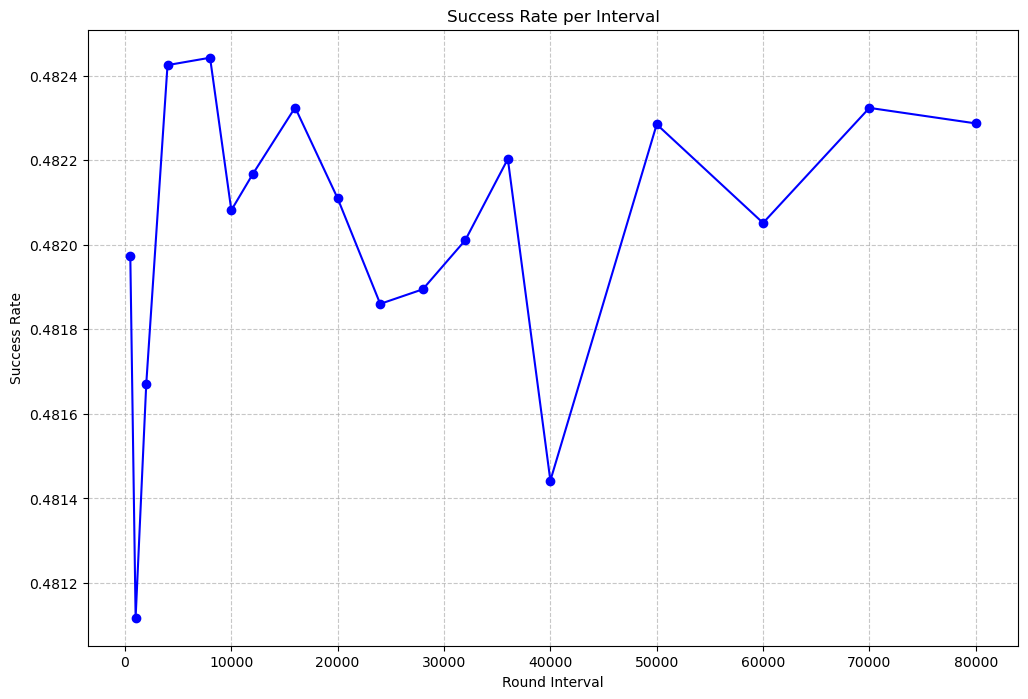

In [42]:
# Plot the success rate for intervals (e.g., after 1000, 2000, 3000, 4000 rounds)
plot_success_rate(minority_game_random, intervals=[1, 500, 1000, 2000, 4000, 8000, 10000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 50000,60000,70000,80000])
                  #12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 50000, 60000,70000,80000])


In [69]:
minority_game.get_variance_normalized()


0.09883541575567614

In [38]:
random.choice([0,1])

1

19592091


(array([ 5., 11., 12., 21., 21., 31., 41., 35., 30., 36., 29., 29., 19.,
        19., 19., 21., 19., 22., 14., 15., 14., 16.,  9., 10.,  0.,  0.,
         2.]),
 array([37980., 38080., 38180., 38280., 38380., 38480., 38580., 38680.,
        38780., 38880., 38980., 39080., 39180., 39280., 39380., 39480.,
        39580., 39680., 39780., 39880., 39980., 40080., 40180., 40280.,
        40380., 40480., 40580., 40680.]),
 <BarContainer object of 27 artists>)

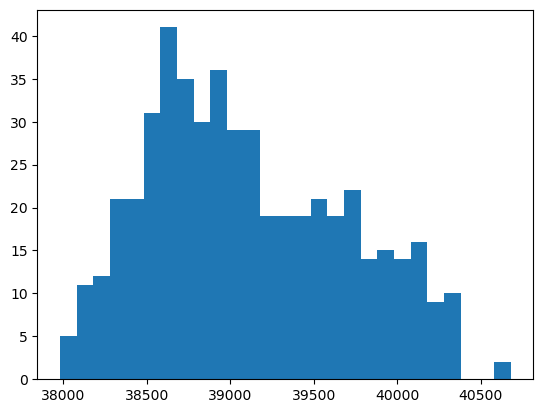

In [54]:
points = [player.points for player in minority_game.players]
print(sum(points))
plt.hist(points,bins=range(min(points), max(points) + 1, 100))

## Phase Transition
By plotting normalised variance against 2^M/N we can clearly see that two phases exist in the game, an undercrowded phase and an overcrowded phase.

In [154]:
# Function to run the simulation and collect data for plotting
def simulate_and_plot(N, S, rounds, M):
    results = []
    z = np.exp((np.log(N)-np.log(9))/30)
    for i in range(19) :
        sigma=[]
        
        n = int(N/(z**i))
        if n % 2 == 0:
            n = n+1
        print(n, M, rounds, S)
        for j in range(20):
            game = MinorityGame(n, M, rounds, S, False, False)
            game.run()
            sigma.append(game.get_variance_normalized())
        s = np.average(sigma)
        print(2**M/n, s)    
        results.append((2**M/n, s))

    # Convert results to plot
    x_values, y_values = zip(*results)
    plt.figure()
    plt.loglog(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.xlabel(r"$2^M / N$")
    plt.ylabel(r"$\sigma^2 / N$")
    plt.title("Variance of Attendance Normalized by Number of Players")
    plt.grid(True)
    plt.savefig("Normalised variance vs z")
    plt.show()

2001 8 40000 2
0.127936031984008 0.6186194820736038
1671 8 40000 2
0.15320167564332735 0.4458315064825703
1395 8 40000 2
0.18351254480286738 0.3203975967570565
1165 8 40000 2
0.21974248927038625 0.2365915722880901
973 8 40000 2
0.263103802672148 0.1613387556691932
813 8 40000 2
0.3148831488314883 0.08537581859751692
679 8 40000 2
0.37702503681885124 0.0606036567933542
567 8 40000 2
0.4514991181657848 0.05716484277524251
473 8 40000 2
0.5412262156448203 0.06039319061700582
395 8 40000 2
0.6481012658227848 0.06781462210340189
331 8 40000 2
0.7734138972809668 0.07449547108789653
275 8 40000 2
0.9309090909090909 0.08810664210443182
231 8 40000 2
1.1082251082251082 0.09709845429707792
193 8 40000 2
1.3264248704663213 0.10799301444478626
161 8 40000 2
1.5900621118012421 0.11954387274048914
135 8 40000 2
1.8962962962962964 0.12825550156898144
113 8 40000 2
2.265486725663717 0.1440468499375
93 8 40000 2
2.752688172043011 0.1494109216918683
79 8 40000 2
3.240506329113924 0.16077204735205697


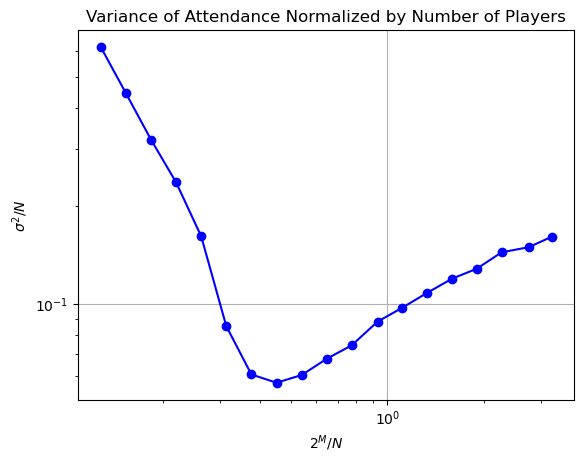

In [160]:
# Example simulation parameters
N = 2001     # Number of players
S = 2       # Number of strategies per player
rounds = 40000
M = 8  # memory

simulate_and_plot(N, S, rounds, M)


1001 7 100 2
0.12787212787212787 0.505995994005994
855 7 100 2
0.1497076023391813 0.4519844795321638
731 7 100 2
0.17510259917920656 0.425757462380301
625 7 100 2
0.2048 0.367720944
535 7 100 2
0.23925233644859814 0.3309372056074766
457 7 100 2
0.2800875273522976 0.3145892778993435
391 7 100 2
0.3273657289002558 0.30670976982097187
333 7 100 2
0.3843843843843844 0.3137088288288289
285 7 100 2
0.44912280701754387 0.26426835087719297
243 7 100 2
0.5267489711934157 0.2680695061728395
209 7 100 2
0.6124401913875598 0.25434492822966515
177 7 100 2
0.7231638418079096 0.24086155367231638
153 7 100 2
0.8366013071895425 0.2556402941176471
129 7 100 2
0.9922480620155039 0.24206205426356586
111 7 100 2
1.1531531531531531 0.23772716216216216
95 7 100 2
1.3473684210526315 0.22515047368421057
81 7 100 2
1.5802469135802468 0.22784648148148148
69 7 100 2
1.855072463768116 0.23169579710144927
59 7 100 2
2.169491525423729 0.2320361016949153
51 7 100 2
2.5098039215686274 0.23516725490196078
43 7 100 2
2.

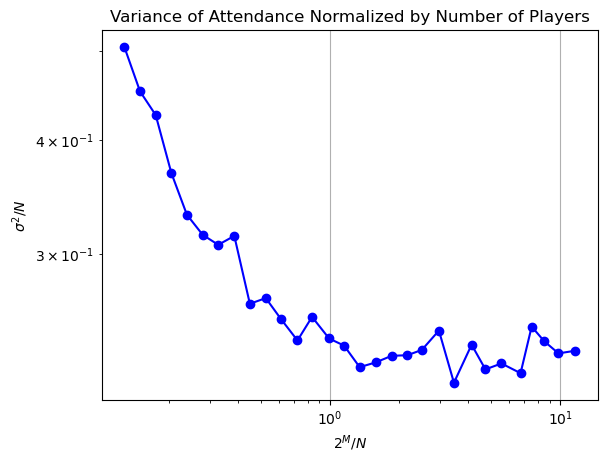

In [70]:
# Example simulation parameters
N = 2001      # Number of players
S = 2       # Number of strategies per player
rounds = 40000
M = 8  # memory

simulate_and_plot(N, S, rounds, M)


In [146]:
# Function to run the simulation and collect data for plotting
def simulate_and_plot_m(N, S, rounds, z):
    results = []

    for i in range(z) :
        sigma=[]
        for j in range(20):
            game = MinorityGame(N, i+2, rounds, S, False, False)
            game.run()
            sigma.append(game.get_variance_normalized())
        s = np.average(sigma)
        print(2**(i+2)/N, s)    
        results.append((2**(i+2)/N, s))

    # Convert results to plot
    x_values, y_values = zip(*results)
    plt.figure()
    plt.loglog(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.xlabel(r"z = $2^M / N$")
    plt.ylabel(r"$\sigma^2 / N$")
    plt.title("Normalized Variance against z")
    plt.grid(True)
    plt.savefig("Phase diagram of variance of attendance")
    plt.show()

0.032 1.757247658108
0.064 0.9797713717359999
0.128 0.5711079217039999
0.256 0.161933760868
0.512 0.05939238231999999
1.024 0.10082719569199998
2.048 0.14306188300399997
4.096 0.184968568312
8.192 0.21234963046399996
16.384 0.23229468646
32.768 0.23888528148399998
65.536 0.24454625912399997
131.072 0.248932041288


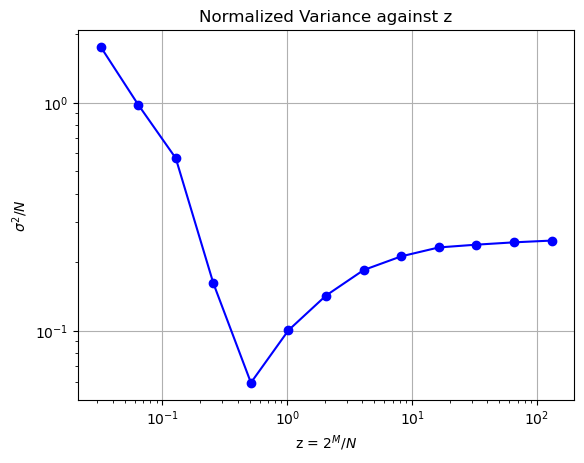

In [163]:
# Example simulation parameters
S = 2       # Number of strategies per player
rounds = 10000
z = 13  # memory goes from 2 to 2+z
N = 125



simulate_and_plot_m(N, S, rounds, z)
